Epoch 1/10


C:\Users\mamoo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0672
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0015
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0012
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0011
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0011
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0012
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0011
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 9.7910e-04
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 9.5946e-04
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 9.8632e-04
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


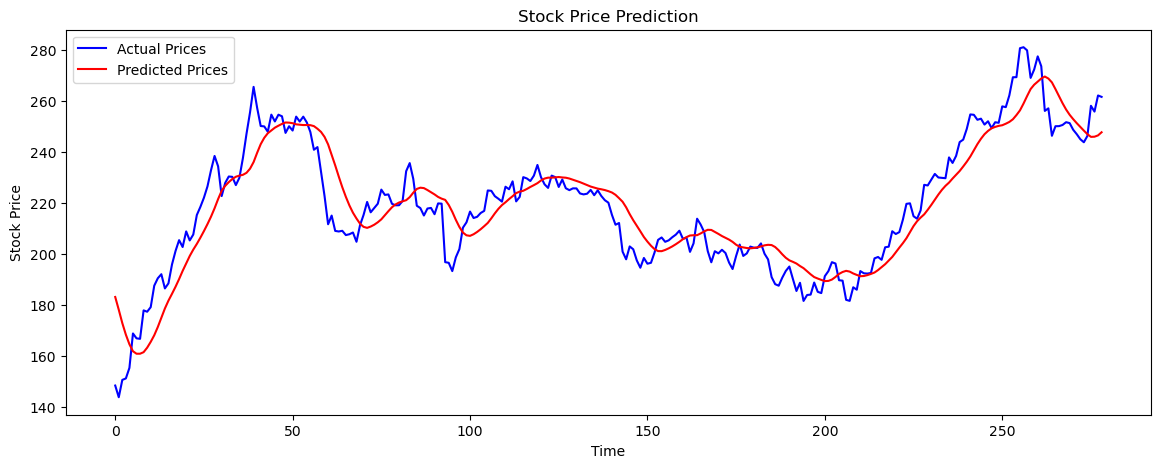

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

data = pd.read_csv('tesla.csv')
data = data[['Close']]  

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
train_ratio = 0.8
train_size = int(len(scaled_data) * train_ratio)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences
time_step = 60
x_train, y_train = [], []
for i in range(time_step, len(train_data)):
    x_train.append(train_data[i-time_step:i])
    y_train.append(train_data[i])

x_test, y_test = [], []
for i in range(time_step, len(test_data)):
    x_test.append(test_data[i-time_step:i])
    y_test.append(test_data[i])

x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=32, epochs=10)
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

plt.figure(figsize=(14, 5))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
